### 建模方法的总结

在贝叶斯建模的时候，思考数据是如何产生的能够加深我们对这种方法的理解。其实建模的本质，就是找到一个模型来描述这些数据的产生规律。现在让我们以短信收发为例，总结一下模型构建的步骤与思路。

- 在拿到数据后，我们首先开始思考，“什么随机变量最能描述这些统计数据呢？”。我们发现 Poisson 随机变量是一个很好的选择。因为，它能够很好地代表统计数据。于是，我们决定就用 Poisson 分布来模拟真实收数据的分布。
- 接下来，我们想，“如果短信接收数据服从 Poisson 分布的话，那么 Poisson 分布需要什么东西呢？”。OK，Poisson 分布需要一个参数 $\lambda$。
- 那么我们知道 $\lambda$ 的具体值吗？不，实际上，不知道。我们猜测 $\lambda$ 有两个取值，一个对应于早期行为，另一个对应于后期行为。我们并不知道这个参数是在什么时候发生的变化。因此，我们还需要假设一个行为变化的时间点 $\tau$。
- 那么，对于这两个 $\lambda$，我们应该选取一个怎样的分布呢？然后，我们想起了可以给正实数赋概率的指数分布函数。但是，指数分布函数也存在它自己的参数：$\alpha$
- 那么，参数 $\alpha$ 是什么样子呢？我们也不知道。此时我们可以继续为参数 $\alpha$ 选择一个分布。但是，我们已经积累了很多未知变量了，现在还是停下来为妙。因此，我们觉得给 $\alpha$ 赋予一个固定的值，那么 $\alpha$ 选择多少为宜呢？

  因为我们知道 $\lambda$ 的范围在 10 到 30 之间，所以如果 $\alpha $ 的取值太小是不适合的。类似的，取值太大，也不好。$\alpha$ 的最佳取值应该可以反映我们对 $\lambda$ 的判断，即此时，真实数据的均值应该和 $\lambda$ 的均值相等。这些，我们已经在实验2中，解释过了。
- 对于 $\tau$ 什么时候发生，我们并没有什么概念。因此，我们假设了 $\tau$ 是来自整个时段的一个离散平均分布。



In [3]:
import numpy as np
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import scipy.stats as stats

# 设总共80天，利用 Numpy 随机确定行为变化的日期
tau = np.random.randint(0, 80)
print(tau)

76


In [4]:
# 这里的 alpha 为想模拟产生的数据的平均值的逆
# 可以根据实际情况，自己定义
alpha = 1./20.
lambda_1, lambda_2 = np.random.exponential(scale=1/alpha, size=2)
print(lambda_1, lambda_2)

24.028417465230916 41.261215114630545


In [5]:
data = np.r_[stats.poisson.rvs(mu=lambda_1, size=tau),
             stats.poisson.rvs(mu=lambda_2, size=80 - tau)]
data

array([20, 25, 21, 19, 24, 22, 20, 22, 25, 32, 15, 27, 33, 26, 24, 25, 21,
       23, 25, 27, 20, 21, 32, 31, 29, 31, 25, 26, 19, 22, 28, 17, 24, 34,
       26, 19, 26, 40, 22, 18, 26, 21, 17, 25, 23, 24, 28, 20, 27, 21, 23,
       31, 17, 26, 32, 23, 29, 17, 25, 22, 19, 24, 21, 30, 24, 22, 33, 29,
       24, 22, 34, 18, 28, 15, 26, 23, 50, 41, 52, 42])

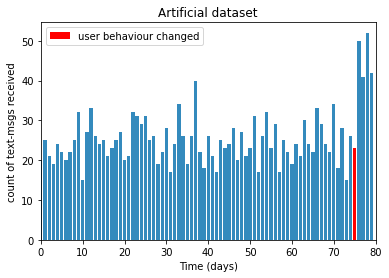

In [6]:
plt.bar(np.arange(80), data, color="#348ABD")
plt.bar(tau-1, data[tau - 1], color="r", label="user behaviour changed")
plt.xlabel("Time (days)")
plt.ylabel("count of text-msgs received")
plt.title("Artificial dataset")
plt.xlim(0, 80)
plt.legend()

从上图可以看出，我们模拟出来的数据并不像真实的观察数据，其实这是合理的。因为，模拟的数据和真实数据相同的可能性本来就很低。而我们使用 PyMC 来建模的目的，就是为了找到最优的参数，来最大化这种可能性。
虽然产生模拟数据的能力只是我们模型的一个小作用。但是，后面我们会发现，这个作用在贝叶斯推断方法中是很重要的。例如，在下面的代码中，我们可以产生更多的人工模拟数据。

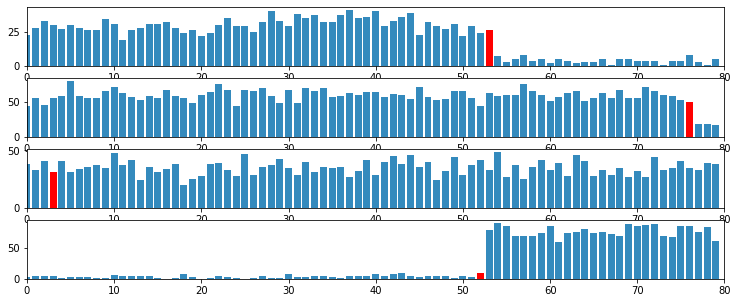

In [8]:
def plot_artificial_sms_dataset():
    tau = stats.randint.rvs(0, 80)
    alpha = 1./20.
    lambda_1, lambda_2 = stats.expon.rvs(scale=1/alpha, size=2)
    data = np.r_[stats.poisson.rvs(mu=lambda_1, size=tau), stats.poisson.rvs(
        mu=lambda_2, size=80 - tau)]
    plt.bar(np.arange(80), data, color="#348ABD")
    plt.bar(tau - 1, data[tau-1], color="r", label="user behaviour changed")
    plt.xlim(0, 80)


figsize(12.5, 5)
plt.title("More example of artificial datasets")
for i in range(4):
    plt.subplot(4, 1, i+1)
    plot_artificial_sms_dataset()